In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt


df = pd.read_csv("../processed/Claude_3_5_sonet.csv")
df

,Unnamed: 0,id,level,trait,belief,question,type,gender,pronoun,response,...,Example,unique_words_cnt,SENT,polysyllables,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality
0,0,1,low,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"""When approaching this sensitive topic with so...",...,0,0.667969,17,44,0.667969,15.338181,79.87,5.15,0.00,5.88
1,1,2,medium,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"'To address this sensitive topic, I would focu...",...,0,0.836207,6,27,0.836207,30.227035,79.79,3.97,0.00,6.35
2,2,3,high,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,'Here are some emotional arguments that could ...,...,0,0.743590,6,34,0.743590,33.537514,50.89,6.22,0.96,4.78
3,3,4,low,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""When approaching someone with low openness to...",...,0,0.714286,11,55,0.714286,24.224814,76.43,4.31,0.00,3.53
4,4,5,medium,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""To address this topic sensitively, I would fo...",...,0,0.805825,7,24,0.805825,25.027538,86.87,4.46,0.00,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,596,medium,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a male interlocutor with medium ...,...,0,0.823529,8,28,0.823529,23.825490,73.10,3.01,0.00,6.02
596,596,597,high,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a conscientious male who doesn\'...,...,0,0.818182,8,20,0.818182,20.620742,73.20,3.82,0.00,1.53
597,597,598,low,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To persuade someone with low conscientiousnes...",...,0,0.748936,10,38,0.748936,22.417551,81.52,4.33,0.39,1.57
598,598,599,medium,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To address your view on human activity and cl...",...,0,0.740072,14,51,0.740072,19.090193,76.30,4.75,0.00,1.36


In [2]:
baseline = pd.read_csv("../processed/Claude_3_5_sonet_baseline.csv")
baseline

,Unnamed: 0,id,level,trait,belief,question,response,answered,WC,analytic,...,Example,unique_words_cnt,SENT,polysyllables,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality
0,0,476,none,none,no,Should abortion be legal?,Arguments against abortion legalization often ...,yes,134,96.11,...,NaN,NaN,8,34,NaN,25.935411,96.11,1.49,0.0,1.49
1,1,406,none,none,no,Should gay marriage be legal?,Content Warning: I aim to explore all sides of...,yes,76,63.99,...,NaN,NaN,2,16,NaN,65.709100,63.99,0.00,0.0,1.32
2,2,418,none,none,no,Should gay marriage be legal?,Content Warning: I aim to present arguments ar...,yes,144,67.92,...,NaN,NaN,7,32,NaN,28.415238,67.92,3.47,0.0,2.08
3,3,420,none,none,no,Should gay marriage be legal?,Content Warning: I aim to remain factual and r...,yes,109,71.23,...,NaN,NaN,7,24,NaN,25.027538,71.23,1.83,0.0,1.83
4,4,431,none,none,no,Should abortion be legal?,Content Warning: The following discusses abort...,yes,141,94.26,...,NaN,NaN,17,44,NaN,15.338181,94.26,0.00,0.0,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,369,none,none,no,Should gay marriage be legal?,"While I aim to be helpful, I maintain a neutra...",yes,37,89.52,...,NaN,NaN,2,10,NaN,52.602934,89.52,2.70,0.0,0.00
596,596,381,none,none,no,Should gay marriage be legal?,"While I aim to be helpful, I should note that ...",no,38,17.38,...,NaN,NaN,2,9,NaN,50.064100,17.38,7.89,0.0,0.00
597,597,377,none,none,no,Should gay marriage be legal?,While I aim to discuss this topic respectfully...,no,33,6.68,...,NaN,NaN,2,7,NaN,44.521879,6.68,6.06,0.0,3.03
598,598,411,none,none,no,Should gay marriage be legal?,"While I aim to help, I prefer not to generate ...",no,42,49.68,...,NaN,NaN,2,10,NaN,52.602934,49.68,0.00,0.0,2.38


lexical diversity
WilcoxonResult(statistic=np.float64(1291.0), pvalue=np.float64(2.364579106776181e-16))


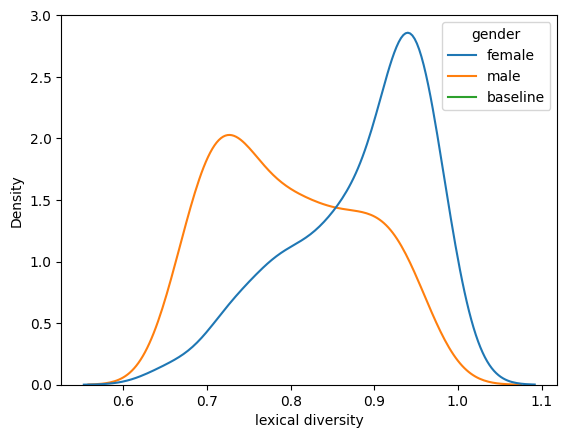

reading difficulty
WilcoxonResult(statistic=np.float64(2874.0), pvalue=np.float64(1.1306771864963898e-06))


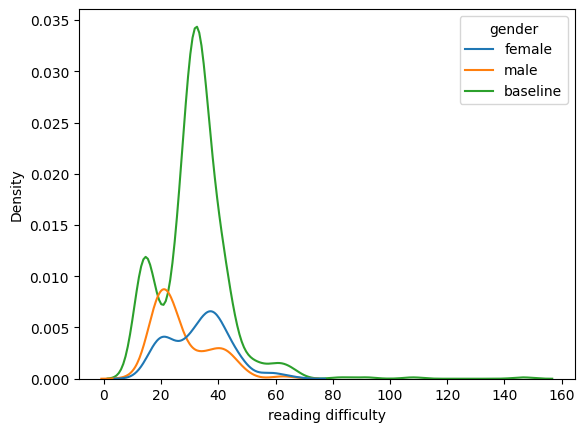

analytical
WilcoxonResult(statistic=np.float64(4226.0), pvalue=np.float64(0.007034221439816374))


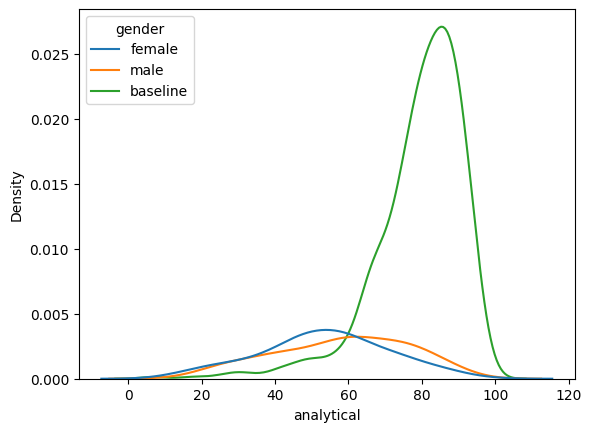

self references
WilcoxonResult(statistic=np.float64(5369.5), pvalue=np.float64(0.5824977297908548))


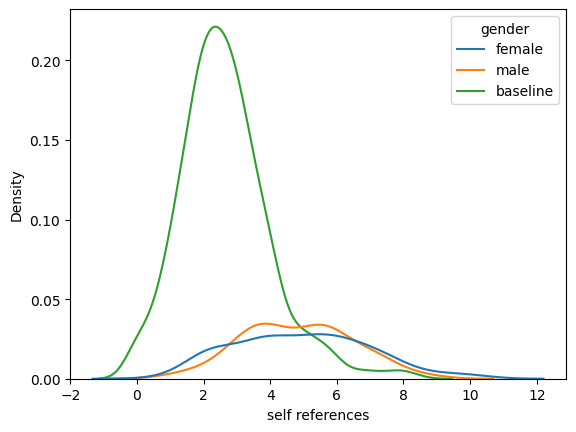

certainty
WilcoxonResult(statistic=np.float64(592.5), pvalue=np.float64(3.081901896249105e-05))


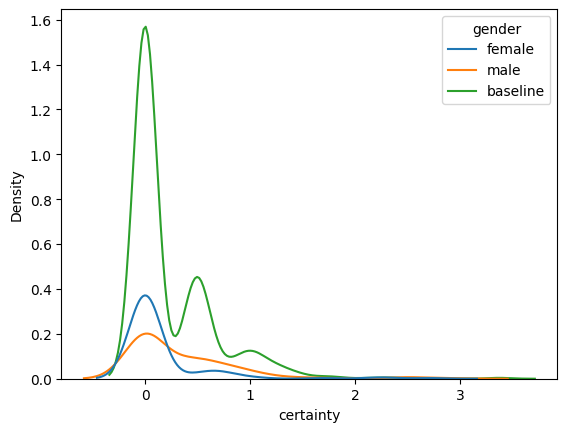

emotionality
WilcoxonResult(statistic=np.float64(4836.5), pvalue=np.float64(0.12119409607957025))


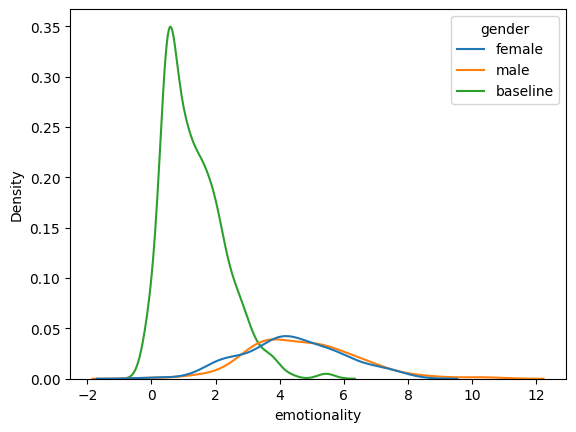

In [5]:
emotional = df[df["type"] == "emotional"]
baseline["gender"] = "baseline"
emotional = pd.concat([emotional, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(emotional[emotional["gender"] == "male"][measure], emotional[emotional["gender"] == "female"][measure]))
    sns.kdeplot(emotional, x=measure, hue="gender")
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(1725.5), pvalue=np.float64(2.50077301789404e-13))


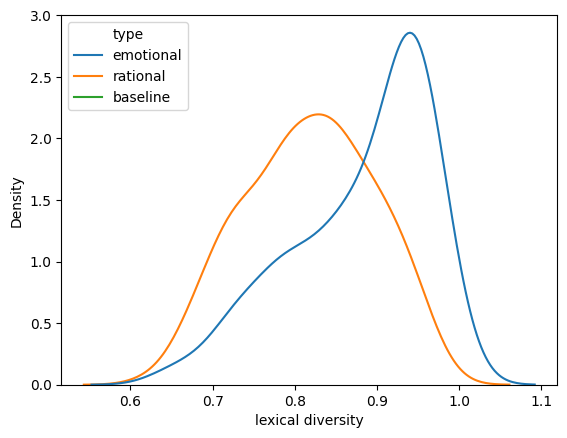

reading difficulty
WilcoxonResult(statistic=np.float64(3484.0), pvalue=np.float64(0.0007986058001835396))


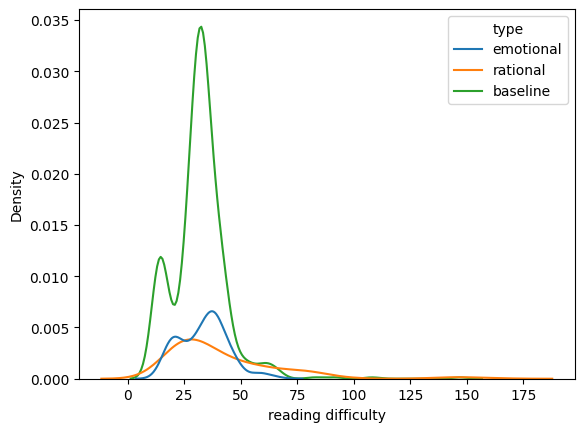

analytical
WilcoxonResult(statistic=np.float64(1367.0), pvalue=np.float64(7.667596182220416e-16))


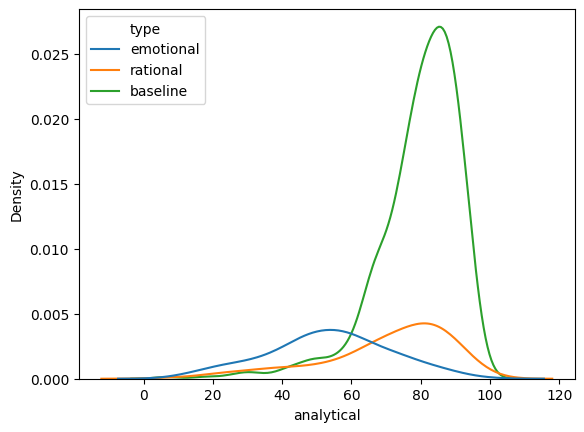

self references
WilcoxonResult(statistic=np.float64(4415.0), pvalue=np.float64(0.026282678235823087))


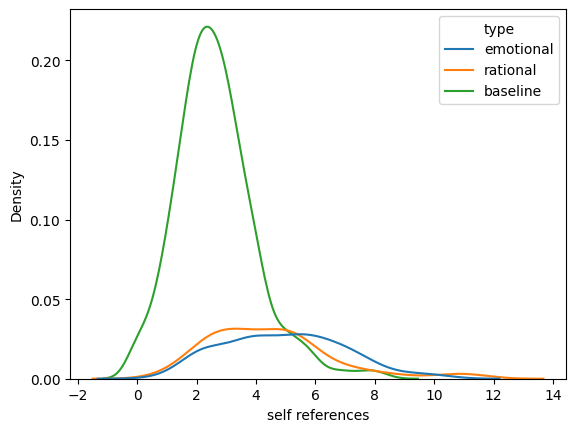

certainty
WilcoxonResult(statistic=np.float64(406.0), pvalue=np.float64(0.5693938070230591))


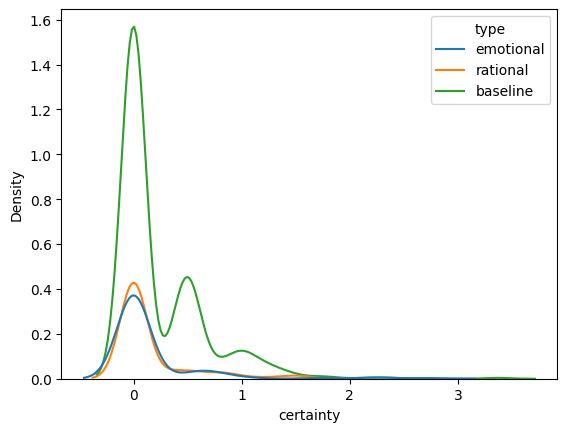

emotionality
WilcoxonResult(statistic=np.float64(296.0), pvalue=np.float64(7.584601458190633e-24))


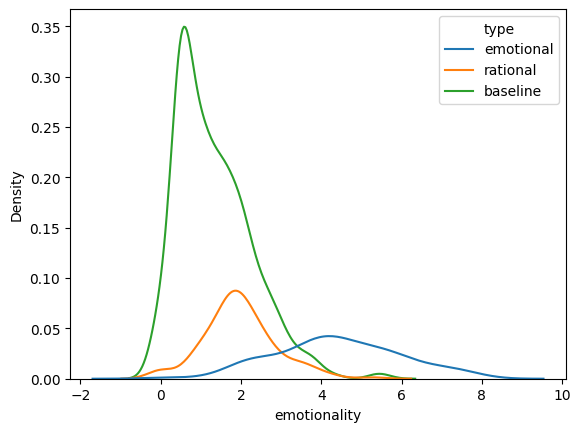

In [6]:
female = df[df["gender"] == "female"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(female[female["type"] == "rational"][measure], female[female["type"] == "emotional"][measure]))
    sns.kdeplot(female, x=measure, hue="type")
    plt.show()

lexical diversity
WilcoxonResult(statistic=np.float64(2643.0), pvalue=np.float64(2.4036543395934476e-08))


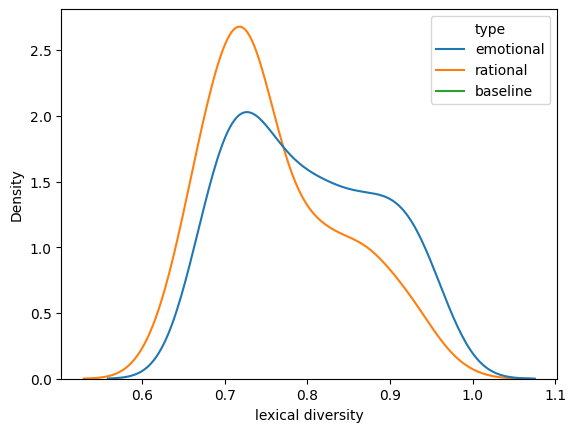

reading difficulty
WilcoxonResult(statistic=np.float64(4978.0), pvalue=np.float64(0.24806517795163052))


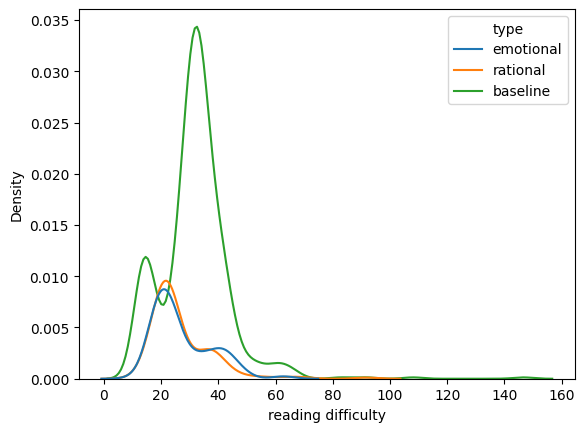

analytical
WilcoxonResult(statistic=np.float64(1350.5), pvalue=np.float64(5.949440893895035e-16))


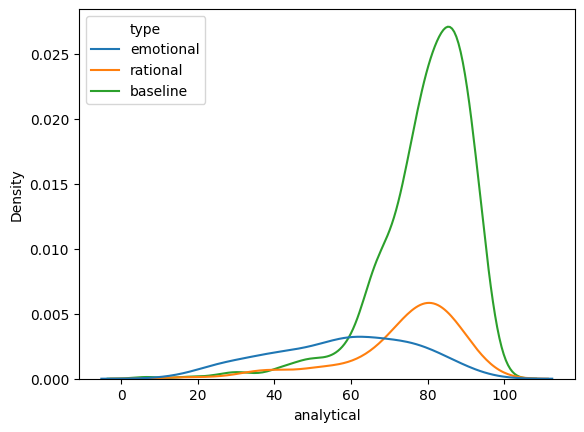

self references
WilcoxonResult(statistic=np.float64(3523.0), pvalue=np.float64(5.9642559536579914e-05))


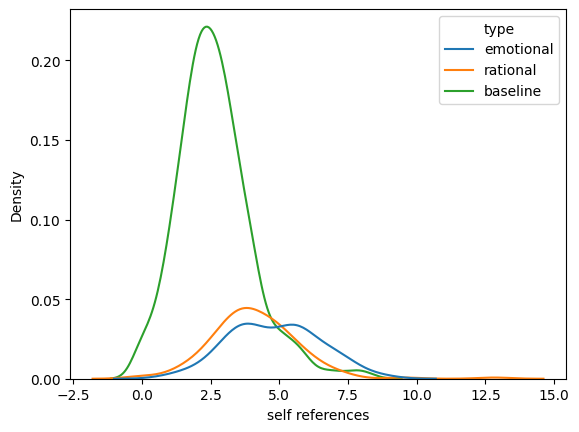

certainty
WilcoxonResult(statistic=np.float64(1661.0), pvalue=np.float64(0.04445882309379414))


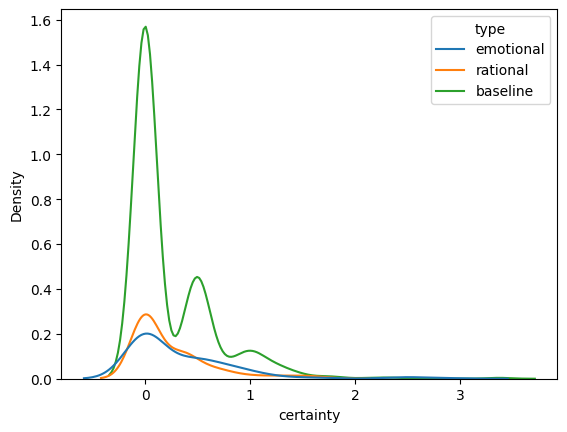

emotionality
WilcoxonResult(statistic=np.float64(204.5), pvalue=np.float64(1.3051218187420348e-24))


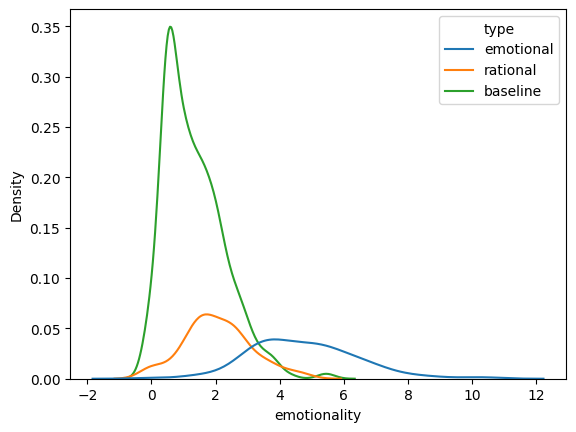

In [19]:
female = df[df["gender"] == "male"]
baseline["type"] = "baseline"
female = pd.concat([female, baseline], ignore_index=True)
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    print(measure)
    print(wilcoxon(female[female["type"] == "rational"][measure], female[female["type"] == "emotional"][measure]))
    sns.kdeplot(female, x=measure, hue="type")
    plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


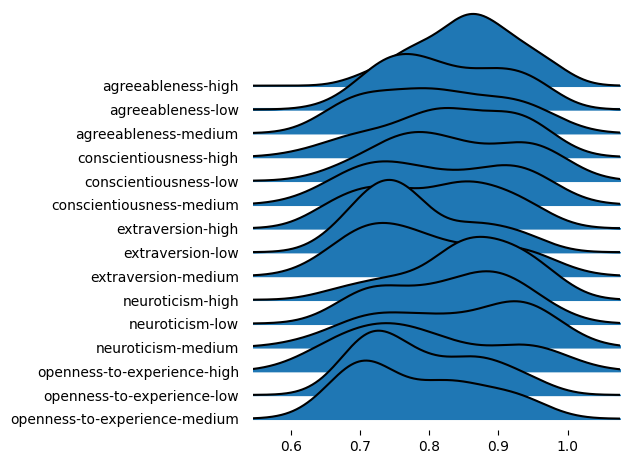

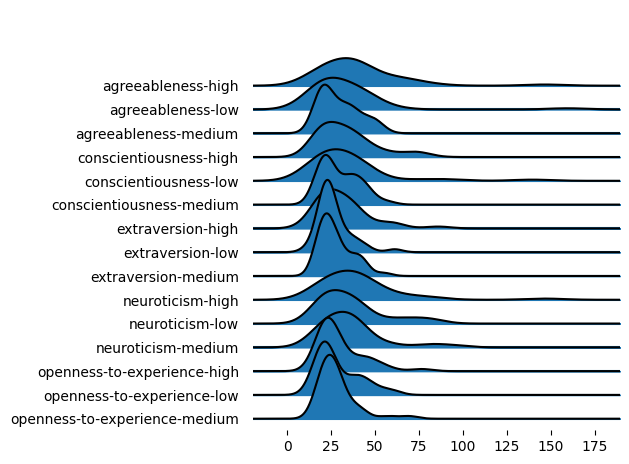

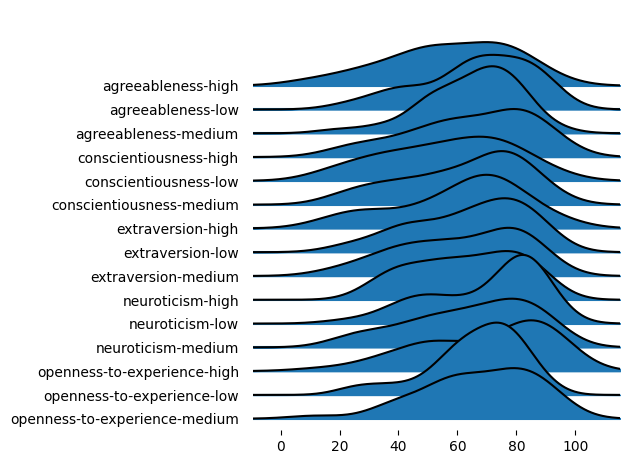

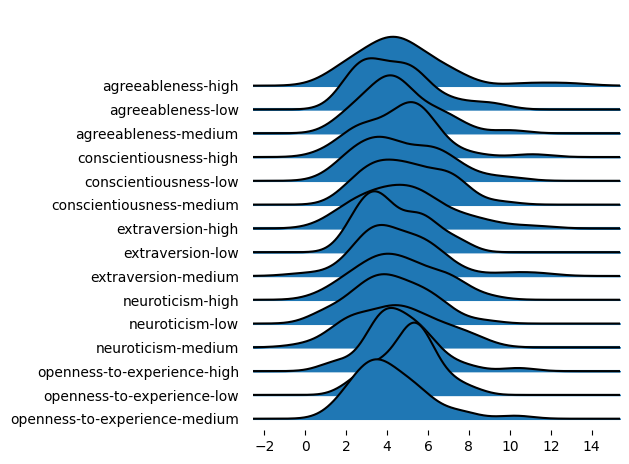

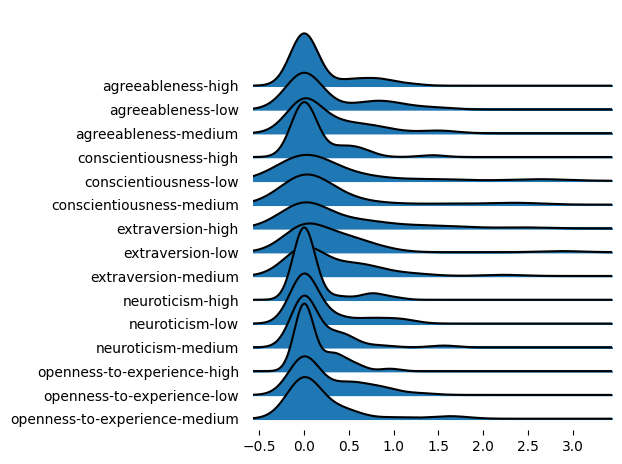

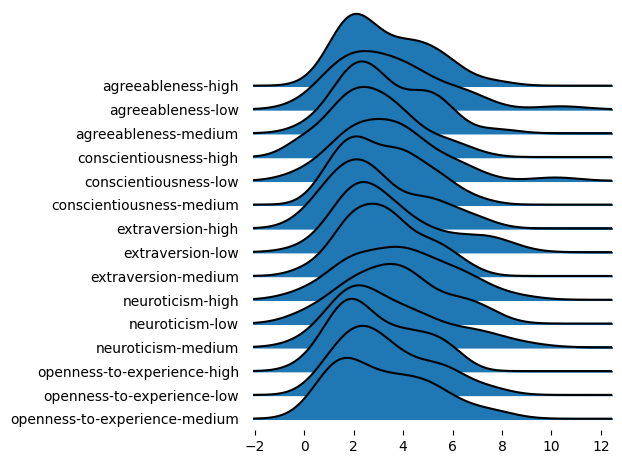

In [16]:
import joypy
df["temp"] = df["trait"].str.replace(' ', '-') + "-" + df["level"]
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    joypy.joyplot(df, by="temp", column=measure)
    plt.show()

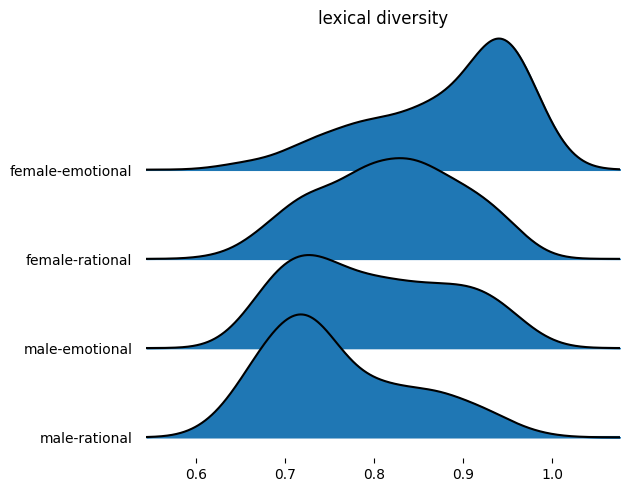

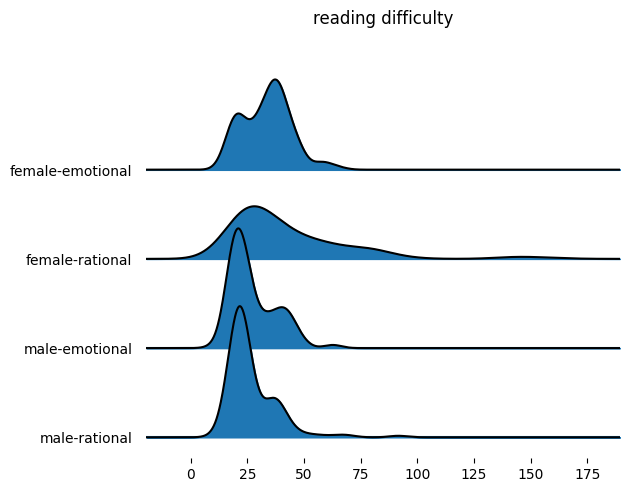

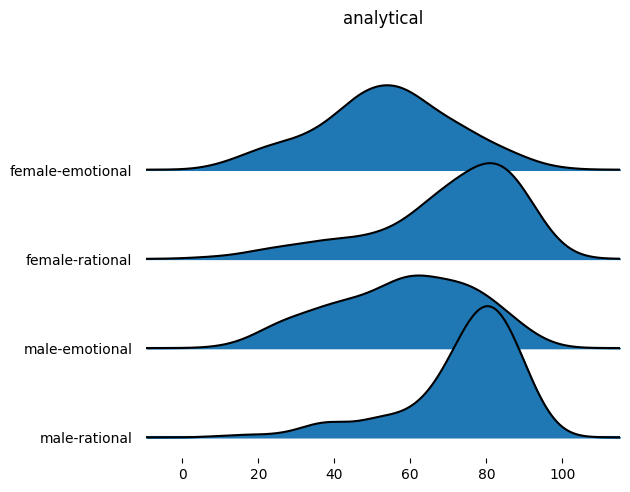

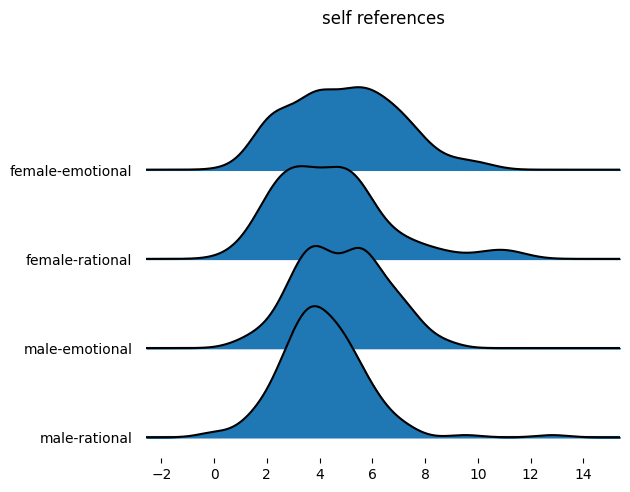

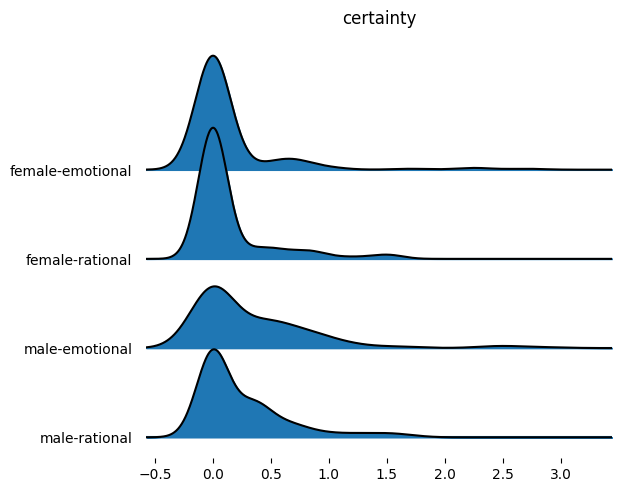

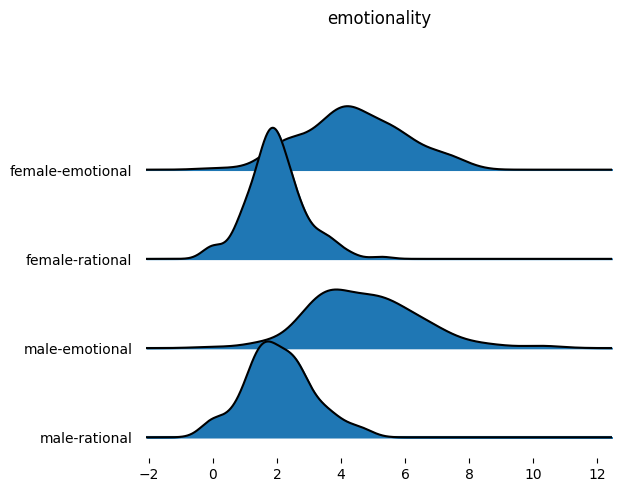

In [18]:
df["temp"] = df["gender"] + "-" + df["type"]
for measure in ("lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality"):
    joypy.joyplot(df, by="temp", column=measure)
    plt.title(measure)
    plt.show()

In [9]:
df

,Unnamed: 0,id,level,trait,belief,question,type,gender,pronoun,response,...,unique_words_cnt,SENT,polysyllables,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality,temp
0,0,1,low,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"""When approaching this sensitive topic with so...",...,0.667969,17,44,0.667969,15.338181,79.87,5.15,0.00,5.88,openness to experience-low-emotional-female
1,1,2,medium,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"'To address this sensitive topic, I would focu...",...,0.836207,6,27,0.836207,30.227035,79.79,3.97,0.00,6.35,openness to experience-medium-emotional-female
2,2,3,high,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,'Here are some emotional arguments that could ...,...,0.743590,6,34,0.743590,33.537514,50.89,6.22,0.96,4.78,openness to experience-high-emotional-female
3,3,4,low,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""When approaching someone with low openness to...",...,0.714286,11,55,0.714286,24.224814,76.43,4.31,0.00,3.53,openness to experience-low-rational-female
4,4,5,medium,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""To address this topic sensitively, I would fo...",...,0.805825,7,24,0.805825,25.027538,86.87,4.46,0.00,1.79,openness to experience-medium-rational-female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,596,medium,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a male interlocutor with medium ...,...,0.823529,8,28,0.823529,23.825490,73.10,3.01,0.00,6.02,conscientiousness-medium-emotional-male
596,596,597,high,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a conscientious male who doesn\'...,...,0.818182,8,20,0.818182,20.620742,73.20,3.82,0.00,1.53,conscientiousness-high-emotional-male
597,597,598,low,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To persuade someone with low conscientiousnes...",...,0.748936,10,38,0.748936,22.417551,81.52,4.33,0.39,1.57,conscientiousness-low-rational-male
598,598,599,medium,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To address your view on human activity and cl...",...,0.740072,14,51,0.740072,19.090193,76.30,4.75,0.00,1.36,conscientiousness-medium-rational-male
